# Model selection
---

### Loading data

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Training set
X_train = np.load("data/train_set.npy", allow_pickle=True)
y_train = np.load("data/train_labels.npy", allow_pickle=True)

# Testing set
X_test = np.load("data/test_set.npy", allow_pickle=True)
y_test = np.load("data/test_labels.npy", allow_pickle=True)

# Columns names
columns = np.load("data/columns.npy", allow_pickle=True)

## Scores

In [3]:
pred_LR = np.load("data/pred_labels_LR.npy", allow_pickle=True)
pred_RF = np.load("data/pred_labels_RF.npy", allow_pickle=True)
pred_SVM = np.load("data/pred_labels_SVM.npy", allow_pickle=True)
pred_NN = np.load("data/pred_labels_NN.npy", allow_pickle=True)

In [4]:
def scores(y_true, y_pred):
    
    true_positives = np.sum((y_true==1) & (y_pred==1))
    false_positives = np.sum((y_true==0) & (y_pred==1))
    true_negatives = np.sum((y_true==0) & (y_pred==0))
    false_negatives = np.sum((y_true==1) & (y_pred==0))


    recall = true_positives / (true_positives+false_negatives)
    precision = true_positives / (true_positives + false_positives)
    
    f_score =  2*(precision*recall)/(precision+recall)
    fpr = false_positives/(false_positives+true_negatives)
    fnr = false_negatives/(false_negatives+true_positives)

    return [fpr, fnr, f_score]

In [5]:
pd.DataFrame(
    [
        scores(y_test, pred_LR),
        scores(y_test, pred_RF),
        scores(y_test, pred_SVM),
        scores(y_test, pred_NN),
    ], 
    columns = ['FPR', 'FNR', "F1-score"], 
    index=['Logistic Regression', 'Random Forest', 'RBF Kernel SVM', 'Neural Network']
)

,FPR,FNR,F1-score
Logistic Regression,0.004453,0.003118,0.996623
Random Forest,0.001908,0.005066,0.996682
RBF Kernel SVM,0.003022,0.004027,0.996750
Neural Network,0.003022,0.002858,0.997336


## Confusion matrix

In [6]:
from sklearn.metrics import confusion_matrix

#### Logistic regression

In [7]:
confusion_matrix(y_test, pred_LR)/y_test.shape[0]

array([[0.44759045, 0.002002  ],
       [0.001716  , 0.54869155]])

#### Random Forest

In [8]:
confusion_matrix(y_test, pred_RF)/y_test.shape[0]

array([[0.44873445, 0.000858  ],
       [0.0027885 , 0.54761905]])

#### SVM

In [9]:
confusion_matrix(y_test, pred_SVM)/y_test.shape[0]

array([[0.44823395, 0.0013585 ],
       [0.0022165 , 0.54819105]])

#### Neural Network

In [10]:
confusion_matrix(y_test, pred_NN)/y_test.shape[0]

array([[0.44823395, 0.0013585 ],
       [0.001573  , 0.54883455]])

## ROC Curve

In [11]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

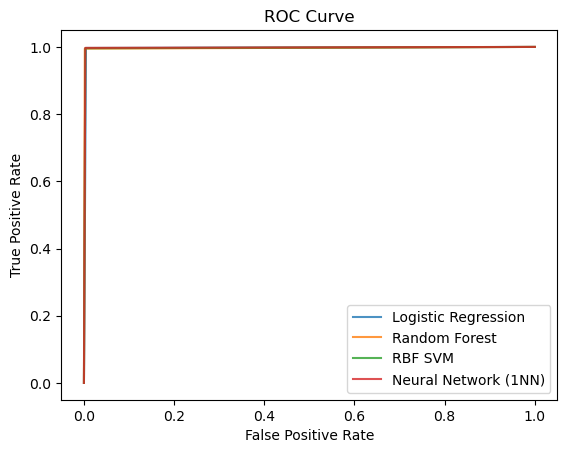

In [12]:
plt.figure()

fpr, tpr, thresh = metrics.roc_curve(y_test, pred_LR)
plt.plot(fpr,tpr,label="Logistic Regression", alpha=.8)

fpr, tpr, thresh = metrics.roc_curve(y_test, pred_RF)
plt.plot(fpr,tpr,label="Random Forest", alpha=.8)

fpr, tpr, thresh = metrics.roc_curve(y_test, pred_SVM)
plt.plot(fpr,tpr,label="RBF SVM", alpha=.8)

fpr, tpr, thresh = metrics.roc_curve(y_test, pred_NN)
plt.plot(fpr,tpr,label="Neural Network (1NN)", alpha=.8)

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=0)
plt.show()

## Feature importance

### Logistic Regression classifier

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
clf = LogisticRegression().fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("accuracy=", clf.score(X_test, y_test) )

accuracy= 0.9962819962819963


### Feature importance analysis

In [15]:
scores = pd.DataFrame({"importance":np.abs(clf.coef_[0,:]), "index":columns}, index=columns).sort_values('importance', ascending=False)
scores

,importance,index
CreationYear_Unknown,5.788725,CreationYear_Unknown
PDFVersion_1.2,2.845905,PDFVersion_1.2
ModificationTZ_UTC\+08:00,2.706211,ModificationTZ_UTC\+08:00
ModificationTZ_UTC\-04:00,2.237117,ModificationTZ_UTC\-04:00
ModificationYear_Unknown,2.212013,ModificationYear_Unknown
...,...,...
CreatorTool_FUJITSU fi-6230dj #2,0.002279,CreatorTool_FUJITSU fi-6230dj #2
CreatorTool_Acrobat PDFMaker 8.0,0.001709,CreatorTool_Acrobat PDFMaker 8.0
CreatorTool_ACOMP.exe WinVer 1b43 jul 14 2003,0.000669,CreatorTool_ACOMP.exe WinVer 1b43 jul 14 2003
CreationYear_1995,0.000243,CreationYear_1995


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

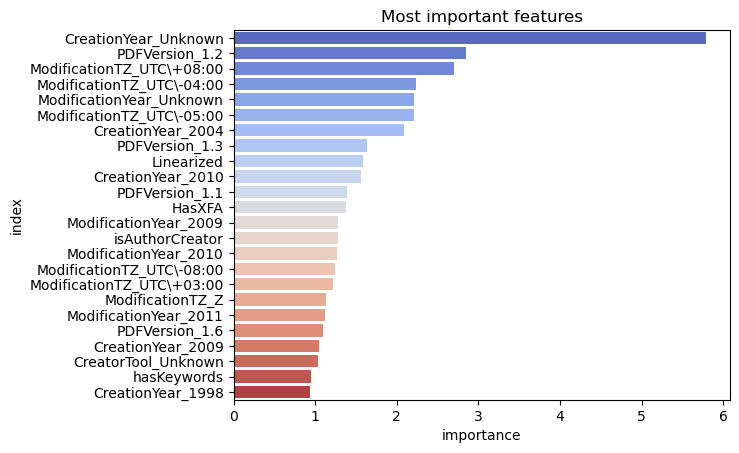

In [17]:
ax = sns.barplot(x="importance", y="index", data = scores.head(24), orient = 'h', palette="coolwarm")
plt.title('Most important features')
plt.show()

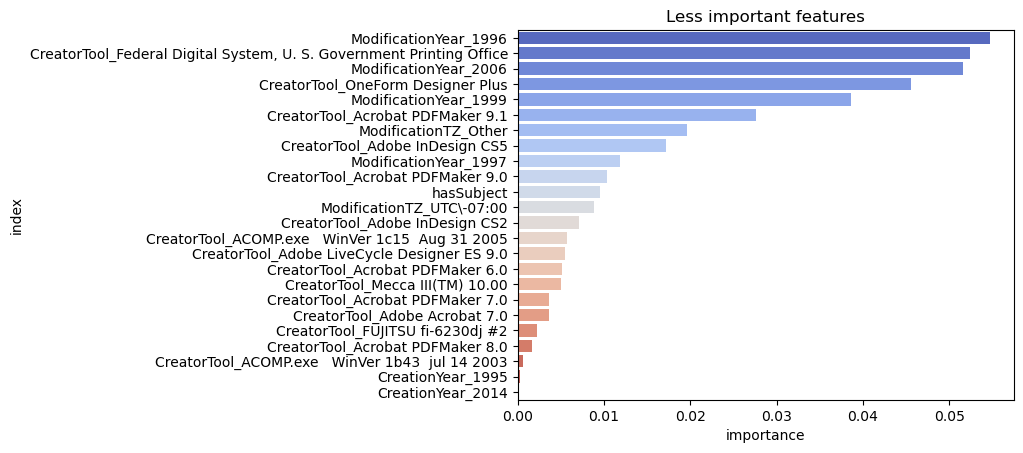

In [18]:
ax = sns.barplot(x="importance", y="index", data = scores.tail(24), orient = 'h', palette="coolwarm")
plt.title('Less important features')
plt.show()

In [19]:
estimators = pd.DataFrame({"feature": columns, "estimator": clf.coef_[0,:]}).sort_values('estimator', ascending=True)

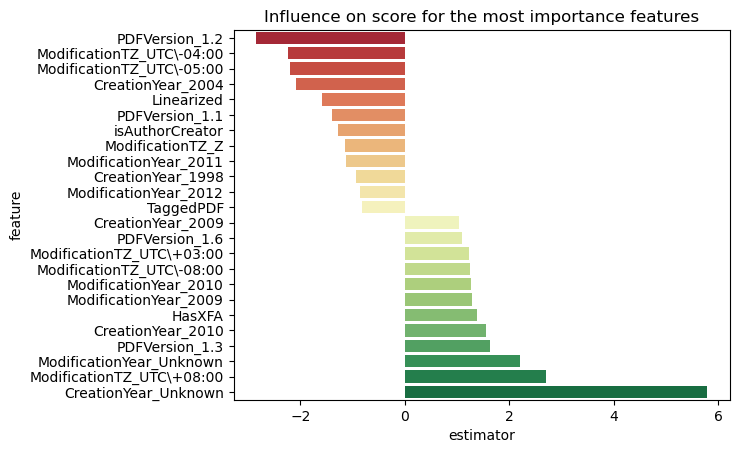

In [20]:
estimators = pd.concat([estimators.head(12), estimators.tail(12)], axis=0)
ax = sns.barplot(x="estimator", y="feature", data = estimators, orient = 'h', palette="RdYlGn")
plt.title('Influence on score for the most importance features')
plt.show()